# 1. Introducción al Dataset y Carga de Datos

In [4]:
# Importamos pandas para manejar el dataset
import pandas as pd

# Cargamos el dataset desde el archivo xlsx
# Nota: Modifique la ruta al archivo si fuese necesario
df = pd.read_excel('data/Datos_proyecto.xlsx')

# Mostramos las primeras filas para conocer la estructura de los datos
print("Primeras 5 filas del dataset:")
display(df.head())

# Obtención de información general sobre las columnas y tipos de datos
print("\nInformación general del dataset:")
df.info()

Primeras 5 filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


In [5]:
# Poner una columna de id
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)
df['id'] = df['id'] + 1  # Empezar IDs desde 1
#df.set_index('id', inplace=True)
print("\nDataset con columna de ID:")
display(df.head())  # Mostrar las primeras filas con la nueva columna de ID


Dataset con columna de ID:


,id,textos,labels
0,1,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,2,Para los niños más pequeños (bebés y niños peq...,4
2,3,"Además, la formación de especialistas en medic...",3
3,4,En los países de la OCDE se tiende a pasar de ...,4
4,5,Este grupo se centró en las personas que padec...,3


# 2. Análisis descriptivo de las opiniones

En esta sección nos centraremos en analizar el campo "textos" del dataset. Este campo contiene una opinión en español. Nuestro objetivo es entender la calidad, cantidad y características textuales de esta información para preparar análisis posteriores.

## Objetivos:

- Identificar cantidad y proporción de valores nulos o vacíos en la columna "textos".  
- Calcular estadísticas básicas como longitud del texto: media, mínimo y máximo.  
- Mostrar visualmente algunas muestras representativas para observar variedades y características del texto.  

## Desarrollo:

1. Se verifican nulos o cadenas vacías en la columna de descripción para evaluar calidad y completitud.  
2. Se calculan estadísticas básicas de longitud de cada opinión para conocer dispersión y valores extremos.  

In [6]:
import matplotlib.pyplot as plt

# Verificamos nulos y vacíos en la columna textos
num_nulls = df['textos'].isnull().sum()
num_empty = (df['textos'].str.strip() == '').sum()

print(f"Número de valores nulos en 'textos': {num_nulls}")
print(f"Número de valores vacíos en 'textos': {num_empty}")

# Calculamos longitud de cada texto
df['text_length'] = df['textos'].str.len()

# Estadísticas básicas sobre la longitud
text_length_stats = df['text_length'].describe()
print("\nEstadísticas básicas de longitud de texto:")
print(text_length_stats)

# Visualización de algunas muestras representativas
print("\nEjemplos de textos:")
display(df[['textos', 'labels']].sample(5, random_state=42))

Número de valores nulos en 'textos': 0
Número de valores vacíos en 'textos': 0

Estadísticas básicas de longitud de texto:
count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: text_length, dtype: float64

Ejemplos de textos:


,textos,labels
1490,"Por lo general, se entiende que los trastornos...",3
387,"En la mayoría de los contratos, el objetivo es...",3
1419,Las tasas de consumo de alcohol y tabaquismo n...,3
410,Hubo una disminución constante en el porcentaj...,4
482,La oferta insuficiente de programas vocacional...,4


# 3. Procesamiento de texto: tokenización y limpieza de palabras

En esta sección se va a procesar texto para análisis basados en palabras. Usaremos el campo "textos" y transformaremos cada texto en una lista de palabras limpias y significativas. Este paso es fundamental para realizar un análisis posterior de frecuencia y relevancia de palabras.

## Objetivos:

- Tokenizar las descripciones: separar cada texto en palabras individuales.  
- Limpiar el texto: pasar a minúsculas, eliminar signos de puntuación y palabras vacías (stopwords).  
- Crear un dataframe con las palabras procesadas para análisis posteriores.

## Desarrollo:

1. Importar librerías necesarias para procesamiento de texto, como `nltk`.  
2. Descargar y definir las stopwords en español.
3. Definir función para limpiar y tokenizar el texto.  
4. Aplicar la función a la columna "textos" y almacenar el resultado en una nueva columna.  
5. Crear un dataframe de palabras tokenizadas para análisis posterior.

In [7]:
import nltk
import string
from nltk.corpus import stopwords

# Descargar stopwords si no están ya descargadas
nltk.download('stopwords')

# Definir las stopwords en inglés (porque las descripciones suelen estar en inglés)
stop_words = set(stopwords.words('spanish'))

# Función para limpiar y tokenizar texto
def clean_tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar la función a la columna Description
df['tokens'] = df['textos'].apply(clean_tokenize)

print("Ejemplos de tokens en los primeros textos:")
display(df[['textos', 'tokens']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejemplos de tokens en los primeros textos:


,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinó...","[aprendizaje, educación, consideran, sinónimos..."
1,Para los niños más pequeños (bebés y niños peq...,"[niños, pequeños, bebés, niños, pequeños, capa..."
2,"Además, la formación de especialistas en medic...","[además, formación, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,"[países, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,"[grupo, centró, personas, padecen, trastornos,..."


# 4. Análisis exploratorio de palabras más frecuentes y representativas

En esta sección exploraremos las palabras extraídas en la tokenización y limpieza de los textos. Nuestro objetivo es identificar las palabras que aparecen con mayor frecuencia y que mejor se asocian al objetivo de desarrollo sostenible.

## Objetivos:

- Calcular la frecuencia de aparición de cada palabra en todos los textos.  
- Visualizar las palabras más frecuentes mediante tablas y gráficos.  
- Analizar la relevancia de las palabras para entender el vocabulario característico del dataset.

## Desarrollo:

1. Aplanar la lista de tokens en una sola lista.  
2. Contar la frecuencia de cada palabra usando `Counter` de la librería `collections`.  
3. Mostrar las 20 palabras más comunes en una tabla.  
4. Graficar con una barra las palabras más frecuentes.

Las 20 palabras más frecuentes en los textos:


,Word,Frequency
0,salud,1107
1,pobreza,1019
2,educación,992
3,países,962
4,atención,900
5,estudiantes,741
6,ocde,587
7,escuelas,586
8,años,559
9,servicios,548


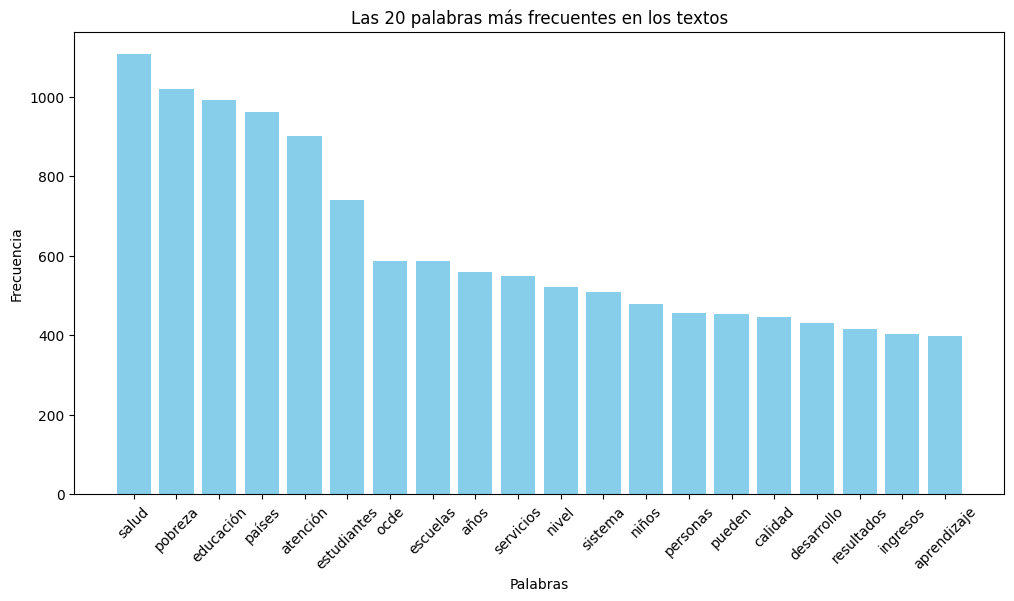

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

# Aplanar la lista de tokens
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

# Contar frecuencia de palabras
word_counts = Counter(all_tokens)

# Obtener las 20 palabras más comunes
most_common_words = word_counts.most_common(20)

# Crear dataframe para visualización
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("Las 20 palabras más frecuentes en los textos:")
display(freq_df)

# Graficar las palabras más frecuentes
plt.figure(figsize=(12,6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Las 20 palabras más frecuentes en los textos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

# 5. Descripción de la variable objetivo


Distribución de niveles de label:
labels
4    1025
3     894
1     505
Name: count, dtype: int64


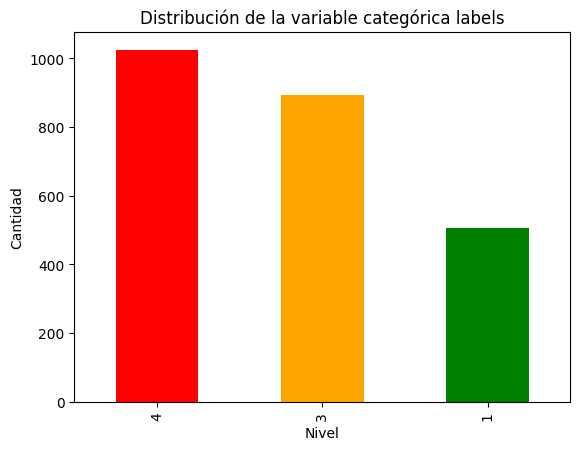

In [9]:
# Mostrar conteos
print("\nDistribución de niveles de label:")
print(df['labels'].value_counts())

# Graficar distribución
df['labels'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribución de la variable categórica labels')
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.show()

# 6. Creación de un DataFrame con TF-IDF de palabras representativas y variable objetivo

Construiremos un nuevo DataFrame que contenga las columnas: `id`, las 20 palabras más comunes como columnas con valores TF-IDF y la variable categórica `labels`.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Las 20 palabras más frecuentes ya están en 'most_common_words'
top_20_words = [word for word, _ in most_common_words]

# Definir vectorizador TF-IDF con vocabulario limitado
vectorizer = TfidfVectorizer(vocabulary=top_20_words)

# Aplicar tf-idf sobre la columna original Description
tfidf_matrix = vectorizer.fit_transform(df['textos'].fillna(''))

# Convertir matriz tf-idf en DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=top_20_words)

# Construir DataFrame final con columnas indicadas
display(df.head())
final_df = pd.concat([df[['id', 'labels']], tfidf_df], axis=1)

print("Primeras filas del DataFrame final con TF-IDF y variable objetivo:")
display(final_df.head())

,id,textos,labels,text_length,tokens
0,1,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,"[aprendizaje, educación, consideran, sinónimos..."
1,2,Para los niños más pequeños (bebés y niños peq...,4,516,"[niños, pequeños, bebés, niños, pequeños, capa..."
2,3,"Además, la formación de especialistas en medic...",3,659,"[además, formación, especialistas, medicina, g..."
3,4,En los países de la OCDE se tiende a pasar de ...,4,693,"[países, ocde, tiende, pasar, cursos, obligato..."
4,5,Este grupo se centró en las personas que padec...,3,608,"[grupo, centró, personas, padecen, trastornos,..."


Primeras filas del DataFrame final con TF-IDF y variable objetivo:


,id,labels,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,...,nivel,sistema,niños,personas,pueden,calidad,desarrollo,resultados,ingresos,aprendizaje
0,1,4,0.000000,0.0,0.841575,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.540141
1,2,4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.824416,0.000000,0.000000,0.401669,0.000000,0.398748,0.0,0.000000
2,3,3,0.735042,0.0,0.000000,0.000000,0.389156,0.000000,0.206718,0.000000,...,0.203759,0.0,0.000000,0.000000,0.207859,0.000000,0.000000,0.000000,0.0,0.000000
3,4,4,0.000000,0.0,0.000000,0.234758,0.000000,0.832674,0.282588,0.301573,...,0.000000,0.0,0.000000,0.000000,0.284148,0.000000,0.000000,0.000000,0.0,0.000000
4,5,3,0.292323,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324136,0.0,0.000000,0.349133,0.000000,0.000000,0.343207,0.000000,0.0,0.000000
